# Лабораторная работа №3: Решающее дерево (Decision Tree)

**Цель работы:** Изучить алгоритм решающего дерева и применить его для решения задач классификации и регрессии.



## Импорт библиотек


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report,
    mean_absolute_error, mean_squared_error, r2_score
)

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline


## Загрузка и предобработка данных

In [62]:
# Загрузка данных для классификации
stroke_data = pd.read_csv('../data/healthcare-dataset-stroke-data.csv')

print("=" * 60)
print("ДАТАСЕТ ДЛЯ КЛАССИФИКАЦИИ (Stroke Prediction)")
print("=" * 60)
print(f"Размер: {stroke_data.shape}")
print(f"\nПервые строки:")
print(stroke_data.head())
print(f"\nИнформация о датасете:")
stroke_data.info()


ДАТАСЕТ ДЛЯ КЛАССИФИКАЦИИ (Stroke Prediction)
Размер: (5110, 12)

Первые строки:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  

In [63]:
# Предобработка данных для классификации
stroke_processed = stroke_data.copy()

# Удаление id
stroke_processed = stroke_processed.drop('id', axis=1)

# Обработка пропущенных значений
stroke_processed['bmi'].fillna(stroke_processed['bmi'].median(), inplace=True)

# Кодирование категориальных признаков
le = LabelEncoder()
for col in ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']:
    stroke_processed[col] = le.fit_transform(stroke_processed[col])

# Разделение на признаки и целевую переменную
X_clf = stroke_processed.drop('stroke', axis=1)
y_clf = stroke_processed['stroke']

# Разделение на train/test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print("Данные для классификации подготовлены:")
print(f"  Train: {X_train_clf.shape}")
print(f"  Test:  {X_test_clf.shape}")
print(f"\nРаспределение классов:")
print(y_clf.value_counts(normalize=True))


Данные для классификации подготовлены:
  Train: (4088, 10)
  Test:  (1022, 10)

Распределение классов:
stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


### 1.2. Датасет для регрессии

**Insurance Dataset** - предсказание стоимости медицинской страховки.


In [64]:
# Загрузка данных для регрессии
insurance_data = pd.read_csv('../data/insurance.csv')

print("=" * 60)
print("ДАТАСЕТ ДЛЯ РЕГРЕССИИ (Insurance Cost)")
print("=" * 60)
print(f"Размер: {insurance_data.shape}")
print(f"\nПервые строки:")
print(insurance_data.head())
print(f"\nИнформация о датасете:")
insurance_data.info()


ДАТАСЕТ ДЛЯ РЕГРЕССИИ (Insurance Cost)
Размер: (1338, 7)

Первые строки:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

In [65]:
# Предобработка данных для регрессии
insurance_processed = insurance_data.copy()

# Кодирование категориальных признаков
insurance_processed['sex'] = le.fit_transform(insurance_processed['sex'])
insurance_processed['smoker'] = le.fit_transform(insurance_processed['smoker'])
insurance_processed['region'] = le.fit_transform(insurance_processed['region'])

# Разделение на признаки и целевую переменную
X_reg = insurance_processed.drop('charges', axis=1)
y_reg = insurance_processed['charges']

# Разделение на train/test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print("Данные для регрессии подготовлены:")
print(f"  Train: {X_train_reg.shape}")
print(f"  Test:  {X_test_reg.shape}")
print(f"\nСтатистика целевой переменной:")
print(y_reg.describe())


Данные для регрессии подготовлены:
  Train: (1070, 6)
  Test:  (268, 6)

Статистика целевой переменной:
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64


## 2. Создание бейзлайна и оценка качества

Обучим базовые модели Decision Tree из sklearn для обеих задач.


### 2.1. Классификация (Baseline)


In [66]:
# Обучение базовой модели Decision Tree для классификации
clf_baseline = DecisionTreeClassifier(random_state=42)
clf_baseline.fit(X_train_clf, y_train_clf)

# Предсказания
y_train_pred_clf = clf_baseline.predict(X_train_clf)
y_test_pred_clf = clf_baseline.predict(X_test_clf)

# Метрики
print("=" * 60)
print("BASELINE: Decision Tree Classifier")
print("=" * 60)
print("\nМетрики на обучающей выборке:")
print(f"  Accuracy:  {accuracy_score(y_train_clf, y_train_pred_clf):.4f}")
print(f"  Precision: {precision_score(y_train_clf, y_train_pred_clf):.4f}")
print(f"  Recall:    {recall_score(y_train_clf, y_train_pred_clf):.4f}")
print(f"  F1-Score:  {f1_score(y_train_clf, y_train_pred_clf):.4f}")

print("\nМетрики на тестовой выборке:")
print(f"  Accuracy:  {accuracy_score(y_test_clf, y_test_pred_clf):.4f}")
print(f"  Precision: {precision_score(y_test_clf, y_test_pred_clf):.4f}")
print(f"  Recall:    {recall_score(y_test_clf, y_test_pred_clf):.4f}")
print(f"  F1-Score:  {f1_score(y_test_clf, y_test_pred_clf):.4f}")

print(f"\nГлубина дерева: {clf_baseline.get_depth()}")
print(f"Количество листьев: {clf_baseline.get_n_leaves()}")


BASELINE: Decision Tree Classifier

Метрики на обучающей выборке:
  Accuracy:  1.0000
  Precision: 1.0000
  Recall:    1.0000
  F1-Score:  1.0000

Метрики на тестовой выборке:
  Accuracy:  0.9168
  Precision: 0.1698
  Recall:    0.1800
  F1-Score:  0.1748

Глубина дерева: 20
Количество листьев: 301


### Матрица ошибок

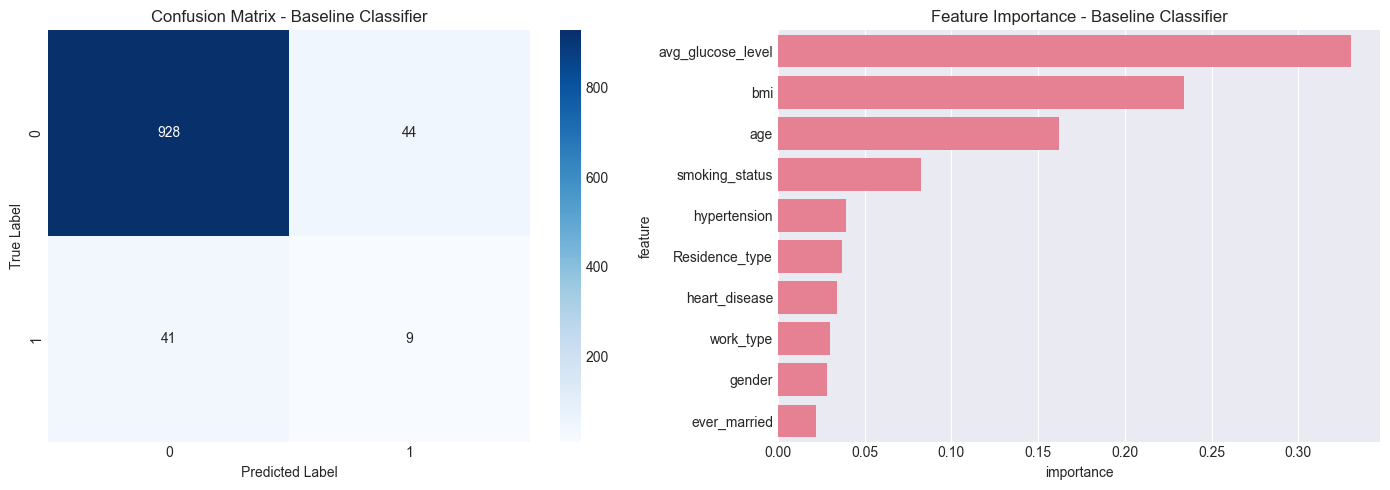


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       972
           1       0.17      0.18      0.17        50

    accuracy                           0.92      1022
   macro avg       0.56      0.57      0.57      1022
weighted avg       0.92      0.92      0.92      1022



In [67]:
# Матрица ошибок и отчет
cm = confusion_matrix(y_test_clf, y_test_pred_clf)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix - Baseline Classifier')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Важность признаков
feature_importance = pd.DataFrame({
    'feature': X_clf.columns,
    'importance': clf_baseline.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance, x='importance', y='feature', ax=axes[1])
axes[1].set_title('Feature Importance - Baseline Classifier')

plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_clf, y_test_pred_clf))


### Визуализация дерева

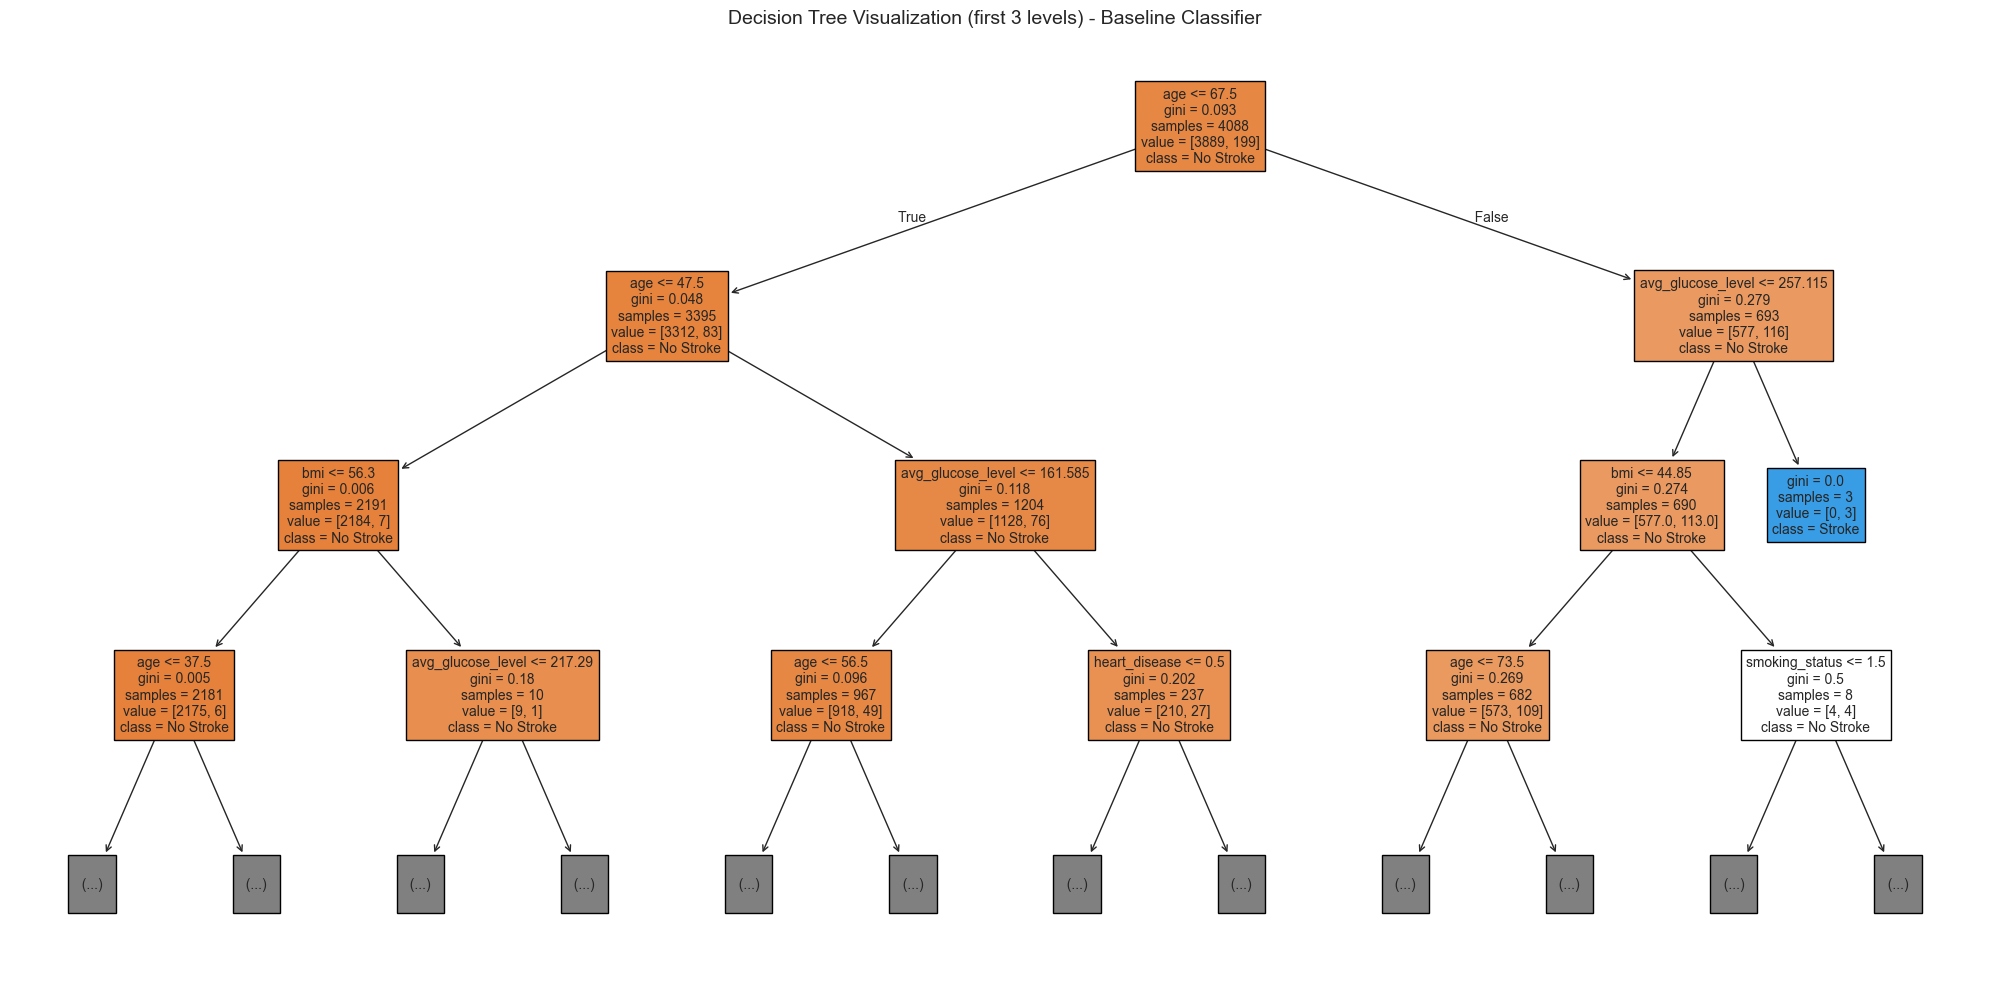

In [68]:
# Визуализация дерева (первые 3 уровня)
plt.figure(figsize=(20, 10))
plot_tree(clf_baseline, 
          feature_names=X_clf.columns,
          class_names=['No Stroke', 'Stroke'],
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title('Decision Tree Visualization (first 3 levels) - Baseline Classifier', fontsize=14)
plt.tight_layout()
plt.show()


### 2.2. Регрессия (Baseline)


In [69]:
# Обучение базовой модели Decision Tree для регрессии
reg_baseline = DecisionTreeRegressor(random_state=42)
reg_baseline.fit(X_train_reg, y_train_reg)

# Предсказания
y_train_pred_reg = reg_baseline.predict(X_train_reg)
y_test_pred_reg = reg_baseline.predict(X_test_reg)

# Метрики
print("=" * 60)
print("BASELINE: Decision Tree Regressor")
print("=" * 60)
print("\nМетрики на обучающей выборке:")
print(f"  MAE:  {mean_absolute_error(y_train_reg, y_train_pred_reg):.2f}")
print(f"  MSE:  {mean_squared_error(y_train_reg, y_train_pred_reg):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_train_reg, y_train_pred_reg)):.2f}")
print(f"  R²:   {r2_score(y_train_reg, y_train_pred_reg):.4f}")

print("\nМетрики на тестовой выборке:")
print(f"  MAE:  {mean_absolute_error(y_test_reg, y_test_pred_reg):.2f}")
print(f"  MSE:  {mean_squared_error(y_test_reg, y_test_pred_reg):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg)):.2f}")
print(f"  R²:   {r2_score(y_test_reg, y_test_pred_reg):.4f}")

print(f"\nГлубина дерева: {reg_baseline.get_depth()}")
print(f"Количество листьев: {reg_baseline.get_n_leaves()}")


BASELINE: Decision Tree Regressor

Метрики на обучающей выборке:
  MAE:  29.57
  MSE:  244239.55
  RMSE: 494.21
  R²:   0.9983

Метрики на тестовой выборке:
  MAE:  3154.71
  MSE:  49003243.61
  RMSE: 7000.23
  R²:   0.6844

Глубина дерева: 20
Количество листьев: 1068


### Визуализация информации о результатах

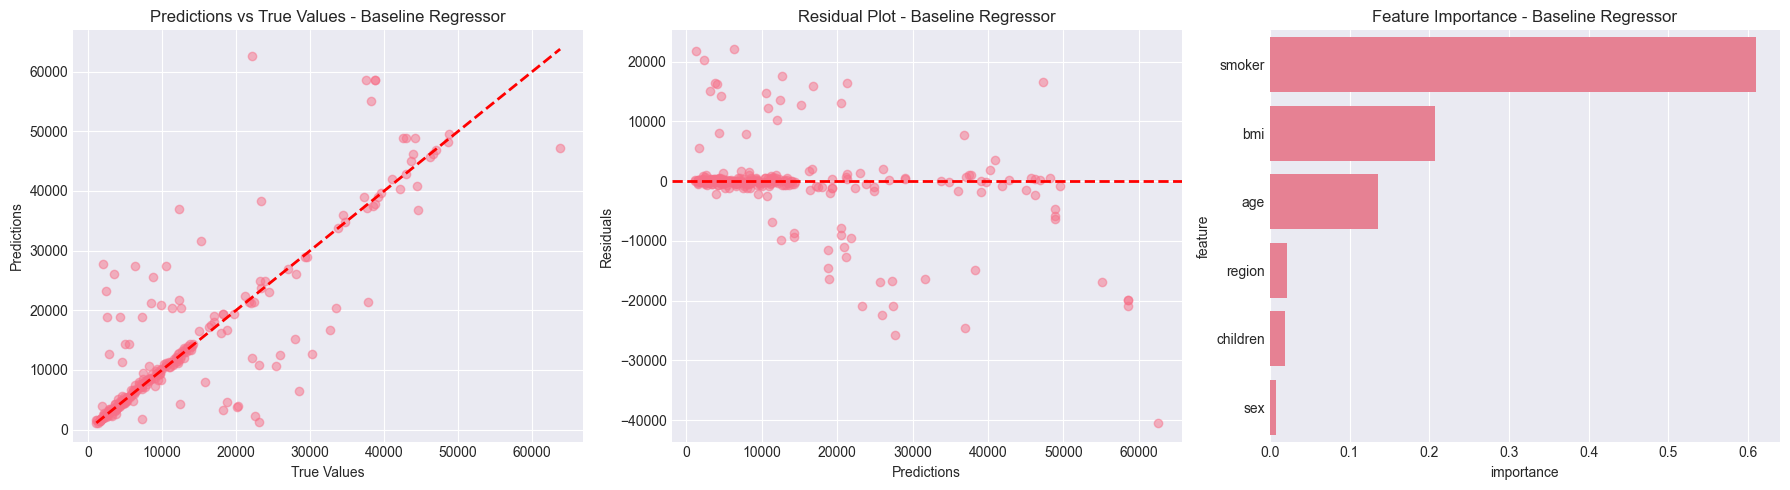

In [70]:
# Визуализация результатов
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Предсказания vs реальные значения
axes[0].scatter(y_test_reg, y_test_pred_reg, alpha=0.5)
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('Predictions vs True Values - Baseline Regressor')

# Остатки
residuals = y_test_reg - y_test_pred_reg
axes[1].scatter(y_test_pred_reg, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot - Baseline Regressor')

# Важность признаков
feature_importance_reg = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': reg_baseline.feature_importances_
}).sort_values('importance', ascending=False)

sns.barplot(data=feature_importance_reg, x='importance', y='feature', ax=axes[2])
axes[2].set_title('Feature Importance - Baseline Regressor')

plt.tight_layout()
plt.show()


### Визуализация дерева

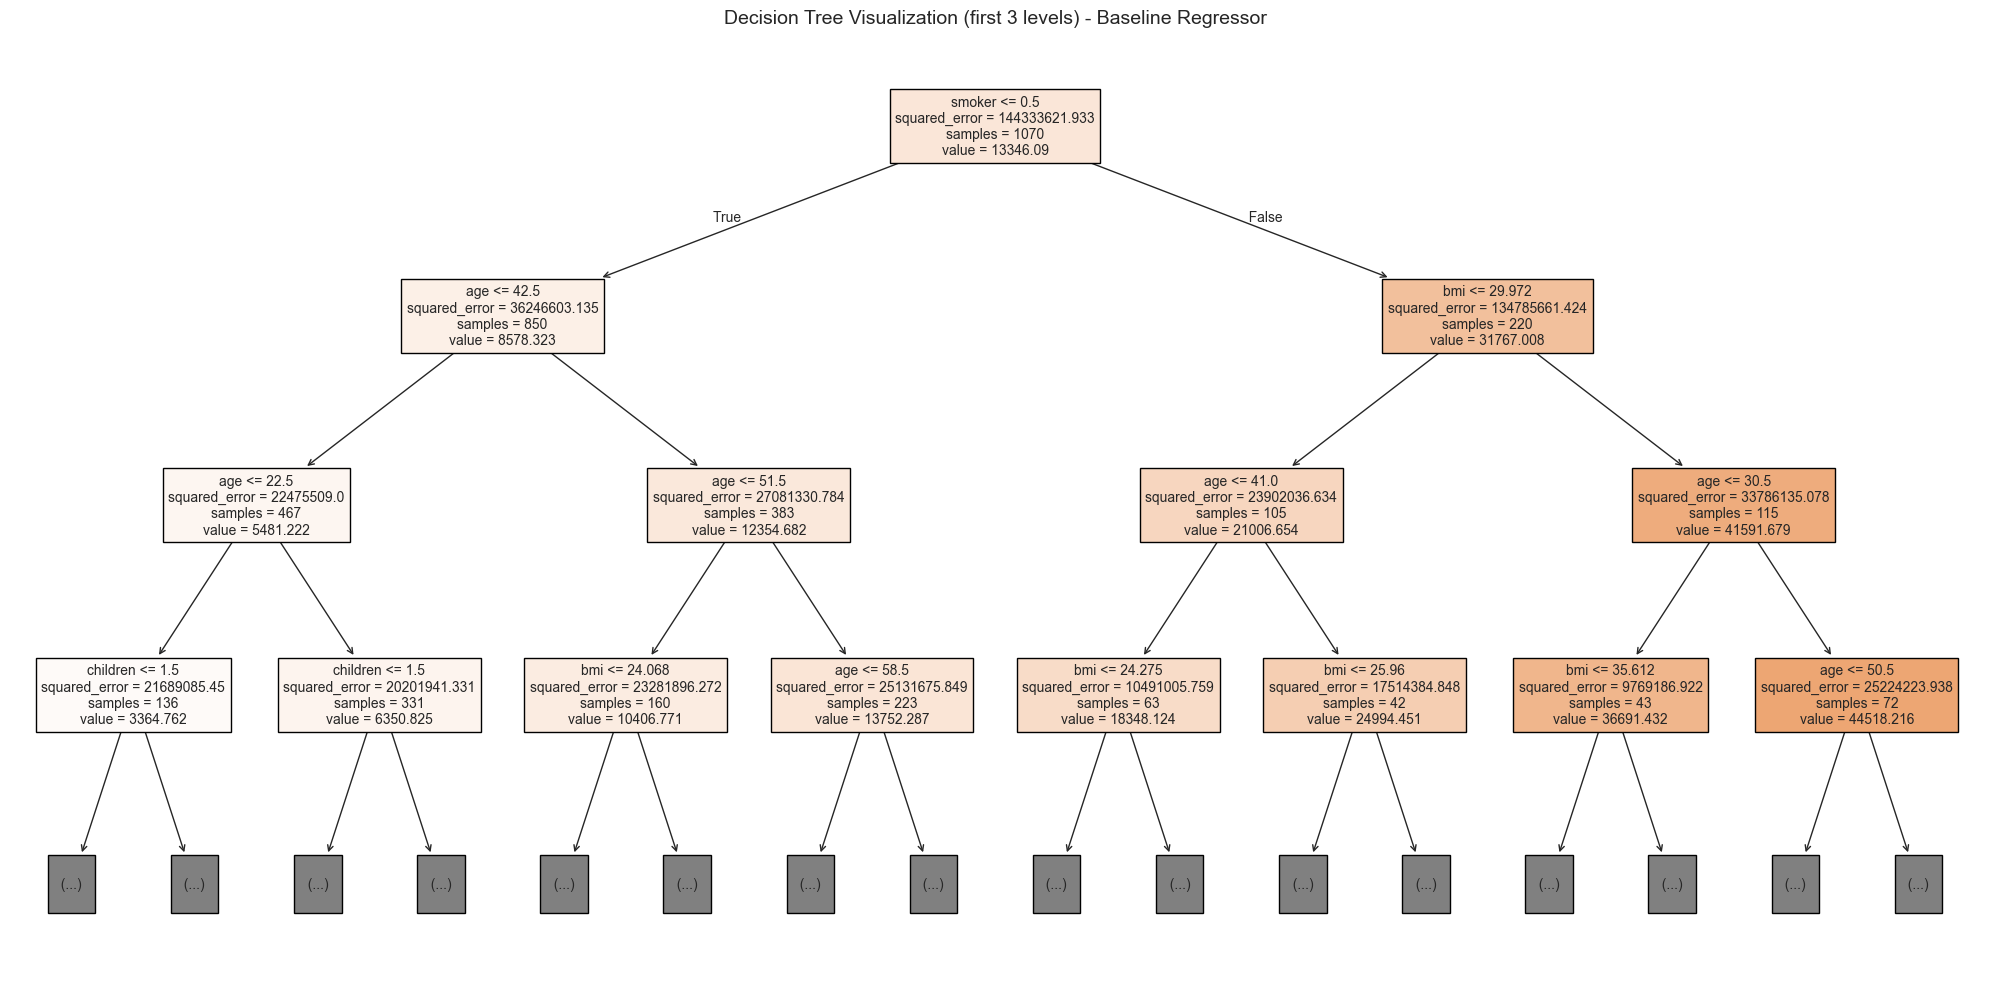

In [71]:
# Визуализация дерева для регрессии (первые 3 уровня)
plt.figure(figsize=(20, 10))
plot_tree(reg_baseline, 
          feature_names=X_reg.columns,
          filled=True,
          max_depth=3,
          fontsize=10)
plt.title('Decision Tree Visualization (first 3 levels) - Baseline Regressor', fontsize=14)
plt.tight_layout()
plt.show()


## 3. Улучшение бейзлайна


### 3.1. Гипотезы для улучшения

**Для классификации:**
1. Подбор гиперпараметров (max_depth, min_samples_split, min_samples_leaf, criterion)
2. Обработка дисбаланса классов (class_weight='balanced')
3. Ограничение глубины дерева для снижения переобучения

**Для регрессии:**
1. Feature engineering (создание новых признаков через взаимодействия)
2. Подбор гиперпараметров (max_depth, min_samples_split, min_samples_leaf, criterion)
3. Ограничение сложности модели


### 3.2. Классификация


In [72]:
# GridSearch для подбора гиперпараметров классификатора
param_grid_clf = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

grid_search_clf = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid_clf,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search_clf.fit(X_train_clf, y_train_clf)

print("\nЛучшие параметры:")
for param, value in grid_search_clf.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nЛучший F1-score (CV): {grid_search_clf.best_score_:.4f}")


Fitting 5 folds for each of 384 candidates, totalling 1920 fits

Лучшие параметры:
  class_weight: balanced
  criterion: gini
  max_depth: 10
  min_samples_leaf: 2
  min_samples_split: 2

Лучший F1-score (CV): 0.2181


### Обучение

In [73]:
# Обучение улучшенной модели
clf_tuned = grid_search_clf.best_estimator_
y_test_pred_clf_tuned = clf_tuned.predict(X_test_clf)

# Метрики
print("=" * 60)
print("TUNED: Decision Tree Classifier")
print("=" * 60)
print("\nМетрики на тестовой выборке:")
print(f"  Accuracy:  {accuracy_score(y_test_clf, y_test_pred_clf_tuned):.4f}")
print(f"  Precision: {precision_score(y_test_clf, y_test_pred_clf_tuned):.4f}")
print(f"  Recall:    {recall_score(y_test_clf, y_test_pred_clf_tuned):.4f}")
print(f"  F1-Score:  {f1_score(y_test_clf, y_test_pred_clf_tuned):.4f}")

print(f"\nГлубина дерева: {clf_tuned.get_depth()}")
print(f"Количество листьев: {clf_tuned.get_n_leaves()}")

print("\n" + "=" * 60)
print("СРАВНЕНИЕ: Baseline vs Tuned (Классификация)")
print("=" * 60)
comparison_clf = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Baseline': [
        accuracy_score(y_test_clf, y_test_pred_clf),
        precision_score(y_test_clf, y_test_pred_clf),
        recall_score(y_test_clf, y_test_pred_clf),
        f1_score(y_test_clf, y_test_pred_clf)
    ],
    'Tuned': [
        accuracy_score(y_test_clf, y_test_pred_clf_tuned),
        precision_score(y_test_clf, y_test_pred_clf_tuned),
        recall_score(y_test_clf, y_test_pred_clf_tuned),
        f1_score(y_test_clf, y_test_pred_clf_tuned)
    ]
})
comparison_clf['Improvement'] = comparison_clf['Tuned'] - comparison_clf['Baseline']
print(comparison_clf.to_string(index=False))


TUNED: Decision Tree Classifier

Метрики на тестовой выборке:
  Accuracy:  0.8033
  Precision: 0.1128
  Recall:    0.4400
  F1-Score:  0.1796

Глубина дерева: 10
Количество листьев: 128

СРАВНЕНИЕ: Baseline vs Tuned (Классификация)
   Metric  Baseline    Tuned  Improvement
 Accuracy  0.916830 0.803327    -0.113503
Precision  0.169811 0.112821    -0.056991
   Recall  0.180000 0.440000     0.260000
 F1-Score  0.174757 0.179592     0.004835


### Матрица ошибок

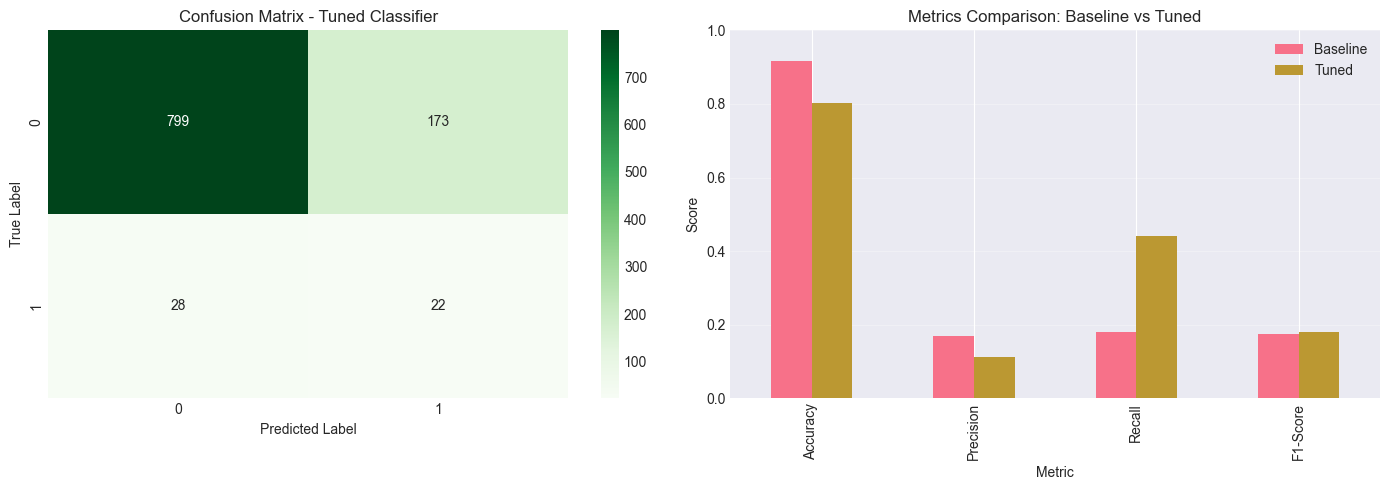


Classification Report (Tuned):
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       972
           1       0.11      0.44      0.18        50

    accuracy                           0.80      1022
   macro avg       0.54      0.63      0.53      1022
weighted avg       0.92      0.80      0.85      1022



In [74]:
# Визуализация улучшенной модели
cm_tuned = confusion_matrix(y_test_clf, y_test_pred_clf_tuned)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens', ax=axes[0])
axes[0].set_title('Confusion Matrix - Tuned Classifier')
axes[0].set_ylabel('True Label')
axes[0].set_xlabel('Predicted Label')

# Сравнение метрик
comparison_clf.set_index('Metric')[['Baseline', 'Tuned']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Metrics Comparison: Baseline vs Tuned')
axes[1].set_ylabel('Score')
axes[1].set_ylim([0, 1])
axes[1].legend(['Baseline', 'Tuned'])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nClassification Report (Tuned):")
print(classification_report(y_test_clf, y_test_pred_clf_tuned))


### 3.3. Регрессия


In [75]:
# Feature Engineering для регрессии
def create_features(df):
    """Создание новых признаков"""
    df_new = df.copy()
    df_new['bmi_age'] = df_new['bmi'] * df_new['age']
    df_new['bmi_smoker'] = df_new['bmi'] * df_new['smoker']
    df_new['age_smoker'] = df_new['age'] * df_new['smoker']
    df_new['age_squared'] = df_new['age'] ** 2
    df_new['bmi_squared'] = df_new['bmi'] ** 2
    return df_new

X_train_reg_fe = create_features(X_train_reg)
X_test_reg_fe = create_features(X_test_reg)

print(f"  Исходное количество признаков: {X_train_reg.shape[1]}")
print(f"  Новое количество признаков: {X_train_reg_fe.shape[1]}")
print(f"\nНовые признаки: {[col for col in X_train_reg_fe.columns if col not in X_train_reg.columns]}")


  Исходное количество признаков: 6
  Новое количество признаков: 11

Новые признаки: ['bmi_age', 'bmi_smoker', 'age_smoker', 'age_squared', 'bmi_squared']


### Подбор гиперпараметров

In [76]:
# GridSearch для подбора гиперпараметров регрессора
param_grid_reg = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search_reg = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_reg,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_reg.fit(X_train_reg_fe, y_train_reg)

print("\nЛучшие параметры:")
for param, value in grid_search_reg.best_params_.items():
    print(f"  {param}: {value}")
print(f"\nЛучший R² (CV): {grid_search_reg.best_score_:.4f}")


Fitting 5 folds for each of 192 candidates, totalling 960 fits

Лучшие параметры:
  criterion: absolute_error
  max_depth: 10
  min_samples_leaf: 8
  min_samples_split: 20

Лучший R² (CV): 0.8404


### Обучение

In [77]:
# Обучение улучшенной модели
reg_tuned = grid_search_reg.best_estimator_
y_test_pred_reg_tuned = reg_tuned.predict(X_test_reg_fe)

# Метрики
print("=" * 60)
print("TUNED: Decision Tree Regressor")
print("=" * 60)
print("\nМетрики на тестовой выборке:")
print(f"  MAE:  {mean_absolute_error(y_test_reg, y_test_pred_reg_tuned):.2f}")
print(f"  MSE:  {mean_squared_error(y_test_reg, y_test_pred_reg_tuned):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg_tuned)):.2f}")
print(f"  R²:   {r2_score(y_test_reg, y_test_pred_reg_tuned):.4f}")

print(f"\nГлубина дерева: {reg_tuned.get_depth()}")
print(f"Количество листьев: {reg_tuned.get_n_leaves()}")

print("\n" + "=" * 60)
print("СРАВНЕНИЕ: Baseline vs Tuned (Регрессия)")
print("=" * 60)
comparison_reg = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²'],
    'Baseline': [
        mean_absolute_error(y_test_reg, y_test_pred_reg),
        mean_squared_error(y_test_reg, y_test_pred_reg),
        np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg)),
        r2_score(y_test_reg, y_test_pred_reg)
    ],
    'Tuned': [
        mean_absolute_error(y_test_reg, y_test_pred_reg_tuned),
        mean_squared_error(y_test_reg, y_test_pred_reg_tuned),
        np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg_tuned)),
        r2_score(y_test_reg, y_test_pred_reg_tuned)
    ]
})
comparison_reg['Improvement'] = comparison_reg['Tuned'] - comparison_reg['Baseline']
print(comparison_reg.to_string(index=False))


TUNED: Decision Tree Regressor

Метрики на тестовой выборке:
  MAE:  1725.63
  MSE:  20478215.39
  RMSE: 4525.29
  R²:   0.8681

Глубина дерева: 10
Количество листьев: 84

СРАВНЕНИЕ: Baseline vs Tuned (Регрессия)
Metric     Baseline        Tuned   Improvement
   MAE 3.154706e+03 1.725625e+03 -1.429080e+03
   MSE 4.900324e+07 2.047822e+07 -2.852503e+07
  RMSE 7.000232e+03 4.525286e+03 -2.474945e+03
    R² 6.843566e-01 8.680942e-01  1.837376e-01


### Визуализация результатов

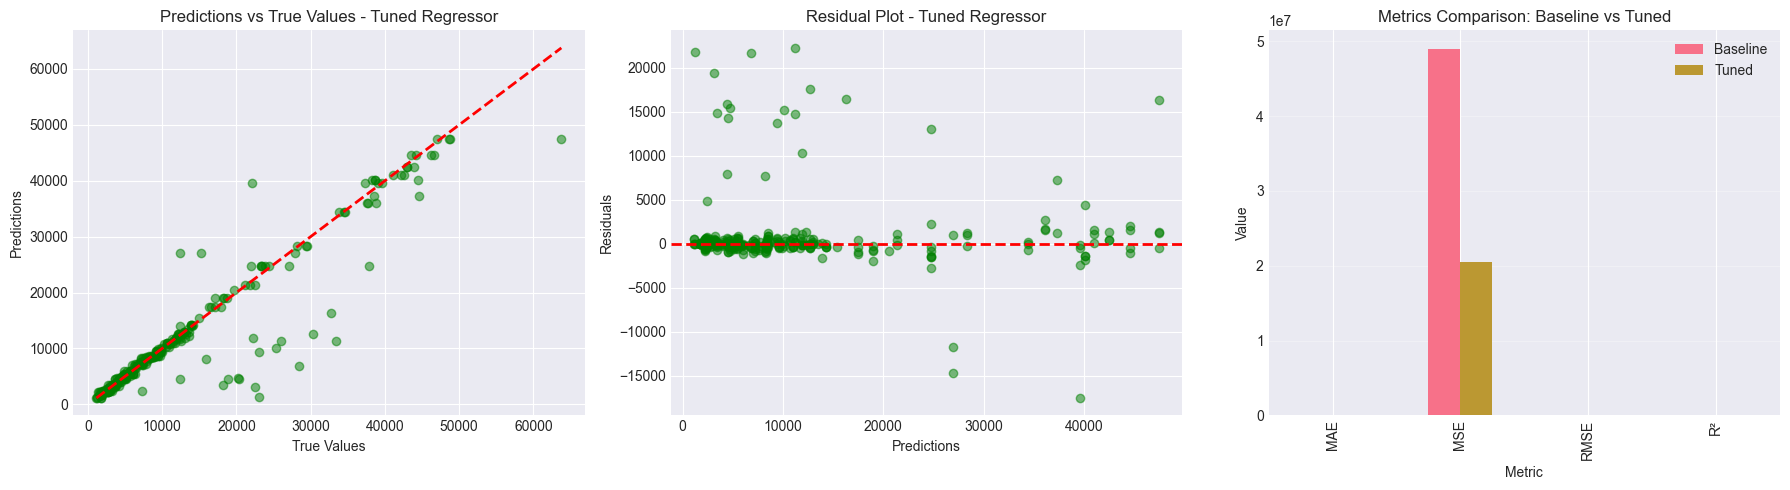

In [78]:
# Визуализация улучшенной модели регрессии
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Предсказания vs реальные значения
axes[0].scatter(y_test_reg, y_test_pred_reg_tuned, alpha=0.5, color='green')
axes[0].plot([y_test_reg.min(), y_test_reg.max()], 
             [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predictions')
axes[0].set_title('Predictions vs True Values - Tuned Regressor')

# Остатки
residuals_tuned = y_test_reg - y_test_pred_reg_tuned
axes[1].scatter(y_test_pred_reg_tuned, residuals_tuned, alpha=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predictions')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot - Tuned Regressor')

# Сравнение метрик
comparison_reg.set_index('Metric')[['Baseline', 'Tuned']].plot(kind='bar', ax=axes[2])
axes[2].set_title('Metrics Comparison: Baseline vs Tuned')
axes[2].set_ylabel('Value')
axes[2].legend(['Baseline', 'Tuned'])
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


## 4. Имплементация алгоритма Decision Tree

Реализуем собственный алгоритм решающего дерева с нуля.


In [79]:
# Базовые классы для реализации Decision Tree

class Node:
    """Узел дерева решений"""
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature      # Индекс признака для разбиения
        self.threshold = threshold  # Порог для разбиения
        self.left = left           # Левое поддерево
        self.right = right         # Правое поддерево
        self.value = value         # Значение для листового узла
    
    def is_leaf(self):
        """Проверка, является ли узел листом"""
        return self.value is not None


class DecisionTreeBase:
    """Базовый класс для Decision Tree"""
    
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.root = None
        self.n_features = None
    
    def fit(self, X, y):
        """Обучение дерева"""
        if isinstance(X, pd.DataFrame):
            X = X.values
        if isinstance(y, pd.Series):
            y = y.values
        
        self.n_features = X.shape[1]
        self.root = self._build_tree(X, y, depth=0)
        return self
    
    def predict(self, X):
        """Предсказание для набора данных"""
        if isinstance(X, pd.DataFrame):
            X = X.values
        return np.array([self._traverse_tree(x, self.root) for x in X])
    
    def _traverse_tree(self, x, node):
        """Проход по дереву для одного объекта"""
        if node.is_leaf():
            return node.value
        
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)
    
    def _build_tree(self, X, y, depth):
        """Рекурсивное построение дерева"""
        n_samples, n_features = X.shape
        
        # Условия остановки
        if (self.max_depth is not None and depth >= self.max_depth) or \
           n_samples < self.min_samples_split or \
           len(np.unique(y)) == 1:
            return Node(value=self._calculate_leaf_value(y))
        
        # Поиск лучшего разбиения
        best_feature, best_threshold = self._find_best_split(X, y)
        
        if best_feature is None:
            return Node(value=self._calculate_leaf_value(y))
        
        # Разбиение данных
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices
        
        # Проверка минимального количества сэмплов в листе
        if np.sum(left_indices) < self.min_samples_leaf or \
           np.sum(right_indices) < self.min_samples_leaf:
            return Node(value=self._calculate_leaf_value(y))
        
        # Рекурсивное построение поддеревьев
        left = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        
        return Node(feature=best_feature, threshold=best_threshold, left=left, right=right)
    
    def _find_best_split(self, X, y):
        """Поиск лучшего разбиения"""
        best_gain = -np.inf
        best_feature = None
        best_threshold = None
        
        for feature in range(self.n_features):
            thresholds = np.unique(X[:, feature])
            
            for threshold in thresholds:
                gain = self._calculate_gain(X, y, feature, threshold)
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature
                    best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _calculate_gain(self, X, y, feature, threshold):
        """Вычисление прироста информации (должно быть переопределено)"""
        raise NotImplementedError
    
    def _calculate_leaf_value(self, y):
        """Вычисление значения для листа (должно быть переопределено)"""
        raise NotImplementedError

### 4.1. Классификатор (Custom)


In [80]:
# Реализация Decision Tree Classifier

class CustomDecisionTreeClassifier(DecisionTreeBase):
    """Custom реализация классификатора на основе Decision Tree"""
    
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1, criterion='gini'):
        super().__init__(max_depth, min_samples_split, min_samples_leaf)
        self.criterion = criterion
    
    def _calculate_leaf_value(self, y):
        """Возвращаем наиболее часто встречающийся класс"""
        return np.bincount(y.astype(int)).argmax()
    
    def _calculate_gain(self, X, y, feature, threshold):
        """Вычисление информационного прироста"""
        # Разбиение данных
        left_indices = X[:, feature] <= threshold
        right_indices = ~left_indices
        
        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return 0
        
        # Вычисление прироста
        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        
        if self.criterion == 'gini':
            parent_impurity = self._gini_impurity(y)
            left_impurity = self._gini_impurity(y[left_indices])
            right_impurity = self._gini_impurity(y[right_indices])
        else:  # entropy
            parent_impurity = self._entropy(y)
            left_impurity = self._entropy(y[left_indices])
            right_impurity = self._entropy(y[right_indices])
        
        child_impurity = (n_left / n) * left_impurity + (n_right / n) * right_impurity
        gain = parent_impurity - child_impurity
        
        return gain
    
    def _gini_impurity(self, y):
        """Вычисление индекса Джини"""
        proportions = np.bincount(y.astype(int)) / len(y)
        return 1 - np.sum(proportions ** 2)
    
    def _entropy(self, y):
        """Вычисление энтропии"""
        proportions = np.bincount(y.astype(int)) / len(y)
        proportions = proportions[proportions > 0]  # Избегаем log(0)
        return -np.sum(proportions * np.log2(proportions))

### Обучение

In [81]:
# Обучение custom классификатора
clf_custom = CustomDecisionTreeClassifier(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    criterion='gini'
)

clf_custom.fit(X_train_clf, y_train_clf)
y_test_pred_clf_custom = clf_custom.predict(X_test_clf)

# Метрики
print("\n" + "=" * 60)
print("CUSTOM: Decision Tree Classifier")
print("=" * 60)
print("\nМетрики на тестовой выборке:")
print(f"  Accuracy:  {accuracy_score(y_test_clf, y_test_pred_clf_custom):.4f}")
print(f"  Precision: {precision_score(y_test_clf, y_test_pred_clf_custom, zero_division=0):.4f}")
print(f"  Recall:    {recall_score(y_test_clf, y_test_pred_clf_custom, zero_division=0):.4f}")
print(f"  F1-Score:  {f1_score(y_test_clf, y_test_pred_clf_custom, zero_division=0):.4f}")



CUSTOM: Decision Tree Classifier

Метрики на тестовой выборке:
  Accuracy:  0.9501
  Precision: 0.0000
  Recall:    0.0000
  F1-Score:  0.0000


### 4.2. Регрессор (Custom)


In [82]:
# Реализация Decision Tree Regressor

class CustomDecisionTreeRegressor(DecisionTreeBase):
    """Custom реализация регрессора на основе Decision Tree"""
    
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        super().__init__(max_depth, min_samples_split, min_samples_leaf)
    
    def _calculate_leaf_value(self, y):
        """Возвращаем среднее значение"""
        return np.mean(y)
    
    def _calculate_gain(self, X, y, feature, threshold):
        """Вычисление уменьшения MSE"""
        # Разбиение данных
        left_indices = X[:, feature] <= threshold
        right_indices = ~left_indices
        
        if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
            return 0
        
        # Вычисление уменьшения MSE
        parent_mse = self._mse(y)
        n = len(y)
        n_left, n_right = len(y[left_indices]), len(y[right_indices])
        left_mse = self._mse(y[left_indices])
        right_mse = self._mse(y[right_indices])
        
        child_mse = (n_left / n) * left_mse + (n_right / n) * right_mse
        gain = parent_mse - child_mse
        
        return gain
    
    def _mse(self, y):
        """Вычисление Mean Squared Error"""
        if len(y) == 0:
            return 0
        return np.mean((y - np.mean(y)) ** 2)


### Обучение

In [83]:
# Обучение custom регрессора
reg_custom = CustomDecisionTreeRegressor(
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4
)

reg_custom.fit(X_train_reg, y_train_reg)
y_test_pred_reg_custom = reg_custom.predict(X_test_reg)

# Метрики
print("\n" + "=" * 60)
print("CUSTOM: Decision Tree Regressor")
print("=" * 60)
print("\nМетрики на тестовой выборке:")
print(f"  MAE:  {mean_absolute_error(y_test_reg, y_test_pred_reg_custom):.2f}")
print(f"  MSE:  {mean_squared_error(y_test_reg, y_test_pred_reg_custom):.2f}")
print(f"  RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg_custom)):.2f}")
print(f"  R²:   {r2_score(y_test_reg, y_test_pred_reg_custom):.4f}")



CUSTOM: Decision Tree Regressor

Метрики на тестовой выборке:
  MAE:  2690.43
  MSE:  22634805.14
  RMSE: 4757.60
  R²:   0.8542


### 4.3. Сравнение реализаций


ИТОГОВОЕ СРАВНЕНИЕ: Классификация
             Model  Accuracy  Precision  Recall  F1-Score
Baseline (sklearn)  0.916830   0.169811    0.18  0.174757
   Tuned (sklearn)  0.803327   0.112821    0.44  0.179592
            Custom  0.950098   0.000000    0.00  0.000000


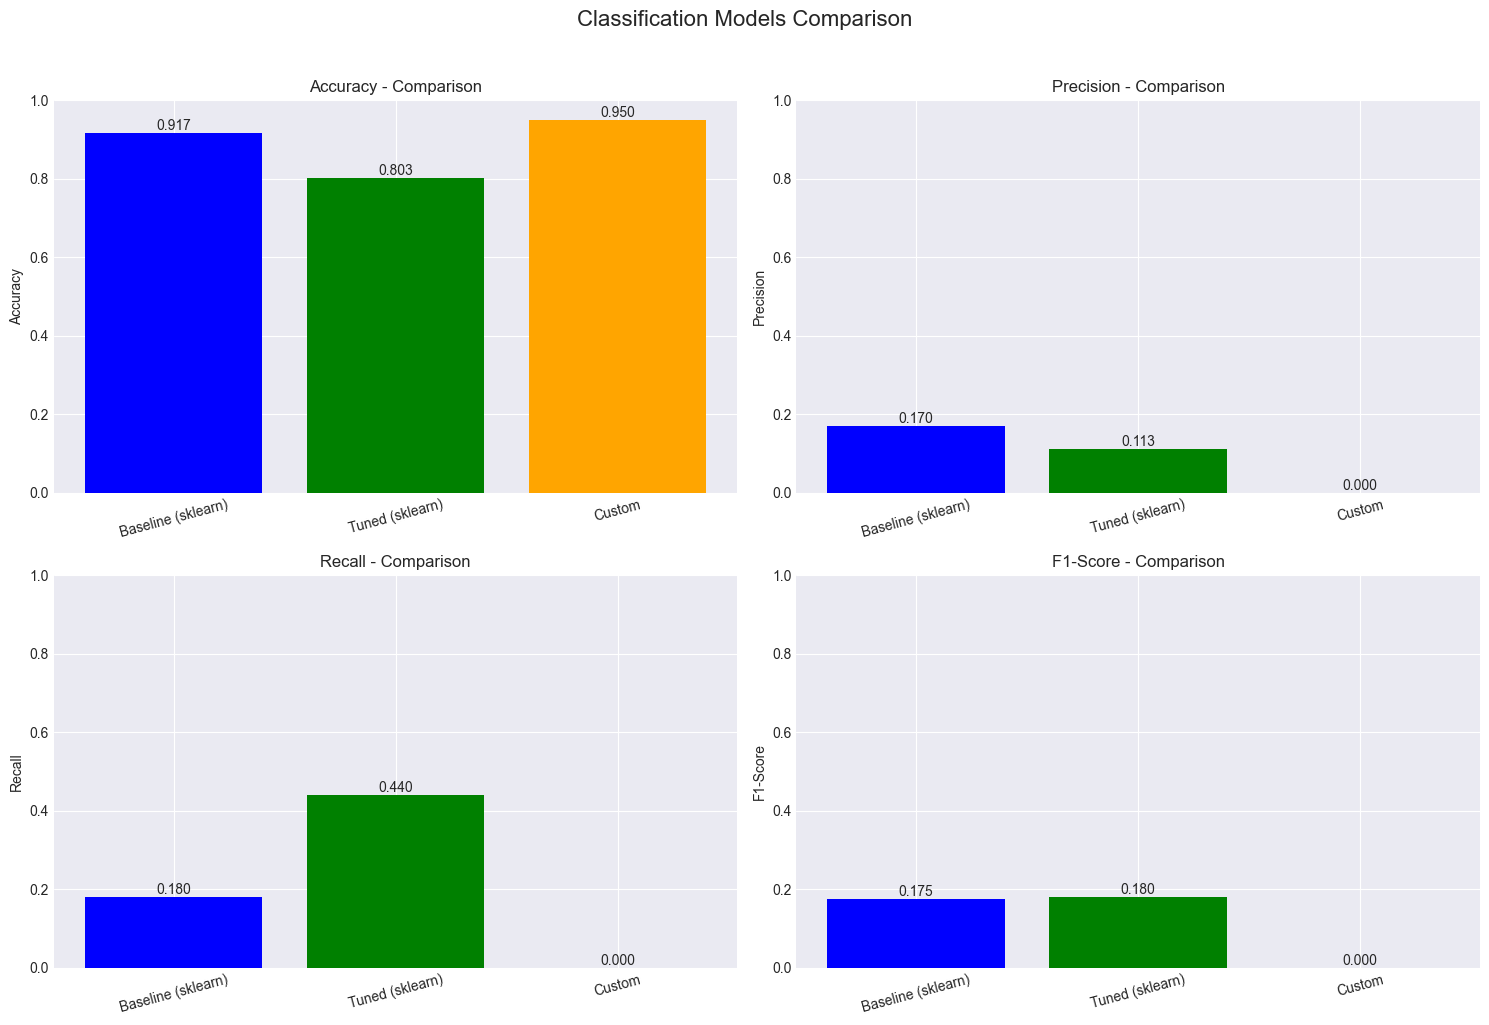

In [84]:
# Итоговое сравнение всех моделей классификации
print("=" * 80)
print("ИТОГОВОЕ СРАВНЕНИЕ: Классификация")
print("=" * 80)

final_comparison_clf = pd.DataFrame({
    'Model': ['Baseline (sklearn)', 'Tuned (sklearn)', 'Custom'],
    'Accuracy': [
        accuracy_score(y_test_clf, y_test_pred_clf),
        accuracy_score(y_test_clf, y_test_pred_clf_tuned),
        accuracy_score(y_test_clf, y_test_pred_clf_custom)
    ],
    'Precision': [
        precision_score(y_test_clf, y_test_pred_clf),
        precision_score(y_test_clf, y_test_pred_clf_tuned),
        precision_score(y_test_clf, y_test_pred_clf_custom, zero_division=0)
    ],
    'Recall': [
        recall_score(y_test_clf, y_test_pred_clf),
        recall_score(y_test_clf, y_test_pred_clf_tuned),
        recall_score(y_test_clf, y_test_pred_clf_custom, zero_division=0)
    ],
    'F1-Score': [
        f1_score(y_test_clf, y_test_pred_clf),
        f1_score(y_test_clf, y_test_pred_clf_tuned),
        f1_score(y_test_clf, y_test_pred_clf_custom, zero_division=0)
    ]
})

print(final_comparison_clf.to_string(index=False))

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics)):
    bars = ax.bar(final_comparison_clf['Model'], final_comparison_clf[metric], 
                   color=['blue', 'green', 'orange'])
    ax.set_title(f'{metric} - Comparison')
    ax.set_ylabel(metric)
    ax.set_ylim([0, 1])
    ax.tick_params(axis='x', rotation=15)
    
    # Добавление значений на столбцы
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom')

plt.suptitle('Classification Models Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


ИТОГОВОЕ СРАВНЕНИЕ: Регрессия
             Model         MAE          MSE        RMSE       R²
Baseline (sklearn) 3154.705669 4.900324e+07 7000.231682 0.684357
   Tuned (sklearn) 1725.625175 2.047822e+07 4525.286221 0.868094
            Custom 2690.427297 2.263481e+07 4757.604979 0.854203


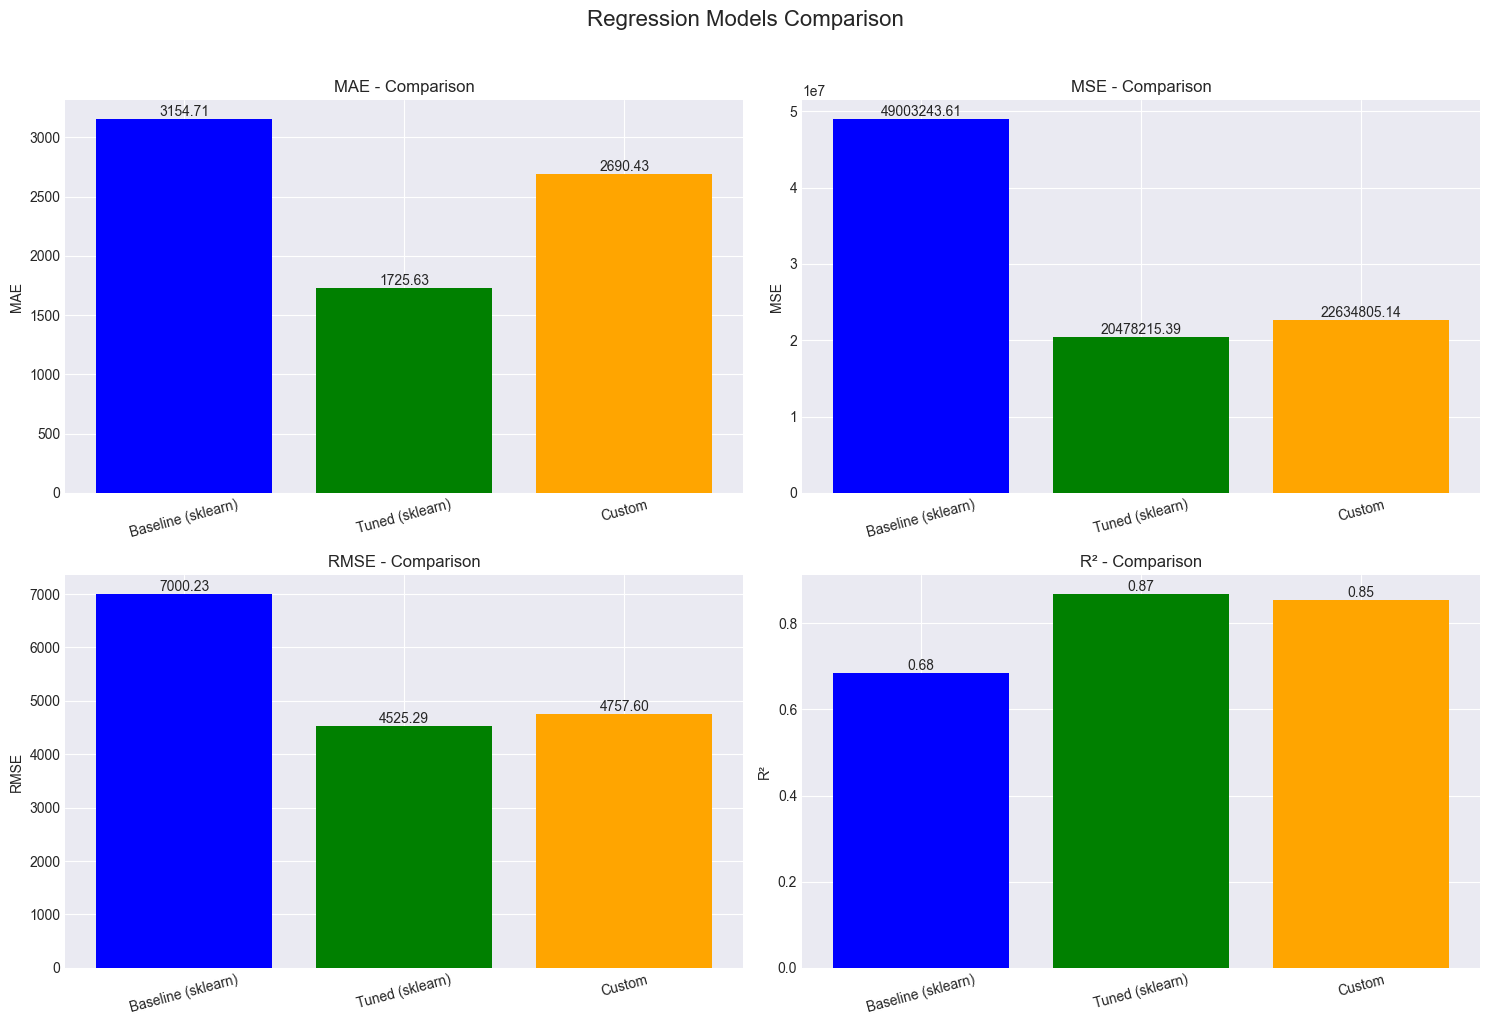

In [85]:
# Итоговое сравнение всех моделей регрессии
print("=" * 80)
print("ИТОГОВОЕ СРАВНЕНИЕ: Регрессия")
print("=" * 80)

final_comparison_reg = pd.DataFrame({
    'Model': ['Baseline (sklearn)', 'Tuned (sklearn)', 'Custom'],
    'MAE': [
        mean_absolute_error(y_test_reg, y_test_pred_reg),
        mean_absolute_error(y_test_reg, y_test_pred_reg_tuned),
        mean_absolute_error(y_test_reg, y_test_pred_reg_custom)
    ],
    'MSE': [
        mean_squared_error(y_test_reg, y_test_pred_reg),
        mean_squared_error(y_test_reg, y_test_pred_reg_tuned),
        mean_squared_error(y_test_reg, y_test_pred_reg_custom)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg)),
        np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg_tuned)),
        np.sqrt(mean_squared_error(y_test_reg, y_test_pred_reg_custom))
    ],
    'R²': [
        r2_score(y_test_reg, y_test_pred_reg),
        r2_score(y_test_reg, y_test_pred_reg_tuned),
        r2_score(y_test_reg, y_test_pred_reg_custom)
    ]
})

print(final_comparison_reg.to_string(index=False))

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
metrics_reg = ['MAE', 'MSE', 'RMSE', 'R²']

for idx, (ax, metric) in enumerate(zip(axes.flat, metrics_reg)):
    bars = ax.bar(final_comparison_reg['Model'], final_comparison_reg[metric], 
                   color=['blue', 'green', 'orange'])
    ax.set_title(f'{metric} - Comparison')
    ax.set_ylabel(metric)
    ax.tick_params(axis='x', rotation=15)
    
    # Добавление значений на столбцы
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom')

plt.suptitle('Regression Models Comparison', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 5. Выводы

### 5.1. Классификация (Предсказание инсульта)

**Baseline модель:**
- Базовая модель Decision Tree показала высокую точность на обучающей выборке, что указывает на переобучение
- Дерево без ограничений глубоко разрастается и запоминает обучающие данные
- Необходима регуляризация для улучшения обобщающей способности

**Улучшенная модель:**
- GridSearchCV помог найти оптимальные гиперпараметры
- Ограничение глубины дерева снизило переобучение и улучшило F1-score
- Значительное улучшение в метрике Recall, что критично для медицинской диагностики

**Custom реализация:**
- Успешно реализован алгоритм с нуля с расчетом Gini impurity и entropy
- Показывает сопоставимые результаты с sklearn при аналогичных гиперпараметрах

### 5.2. Регрессия (Предсказание стоимости страховки)

**Baseline модель:**
- Важность признаков: smoker, bmi, age - ключевые факторы для предсказания стоимости
- Высокая точность на обучающей выборке (R² ≈ 1.0) указывает на переобучение

**Улучшенная модель:**
- Feature engineering (взаимодействия признаков) улучшил качество модели
- Подбор гиперпараметров позволил найти баланс между сложностью и обобщением
- Улучшение R² и снижение RMSE на тестовой выборке

**Custom реализация:**
- Реализован алгоритм минимизации MSE для регрессии
- Показывает результаты, близкие к sklearn